# A biblioteca SciPy

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


A biblioteca SciPy implementa uma vasta gama de algoritmos em computação científica, divididos em vários módulos:

* `scipy.cluster` - K-médias, *vector quantization*
* `scipy.constants` - constantes físicas e matemáticas
* `scipy.fftpack` - transformada de Fourier
* `scipy.integrate` - integração
* `scipy.interpolate` - interpolação
* `scipy.io` - IO, permite a leitura de arquivos `.mat` (Matlab)
* `scipy.linalg` - álgebra linear
* `scipy.ndimage` - processamento de sinais $n$-dimensionais
* `scipy.odr` - regressão 
* `scipy.optimize` - otimização
    * BFGS, método de Newton, raízes de funções, *simulated annealing*,...
* `scipy.signal` - processamento de sinais
* `scipy.sparse` - matrizes esparsas
* `scipy.spatial` - algoritmos e estruturas de dados espaciais
    * KD-Trees, Voronoi, Delaunay e fecho convexo
* `scipy.special` - funções matemáticas diversas
    * Bessel, funções elípticas, hipergeométricas, parabólicas,...
* `scipy.stats` - estatística

SciPy pode ser vista como uma biblioteca equivalente à GSL (*GNU Scientific Library* C/C++) ou a várias *toolboxes* de MATLAB. SciPy faz uso da NumPy para produzir implementações eficientes. 

O pesquisador deveria preferir implementações oferecidas pela SciPy, como argumentado por Haenel *et al.* nas [Python scientific lecture notes](http://scipy-lectures.github.io/intro/scipy.html):

> Antes de implementr uma rotina, é importante checar se o processamento desejado já não se encontra implementado na SciPy. Como programadores, cientistas geralmente tendem a reinventar a roda, o que leva a código incorreto, não-otimizado e difícil de ser compartilhado e mantido. Em contraste, as rotinas da SciPy são otimizadas e testadas, e deveriam ser utilizadas sempre que possível.

Para ilustrar uso e potencial da biblioteca, nas próximas seções serão apresentadas algumas rotinas encontradas em três dos módulos da SciPy: `linalg` para álgebra linear, `optimize` para otimização contínua e `stats` para estatística.

## Álgebra Linear - `scipy.linalg`

O módulo `scipy.linalg` fornece operações básicas de álgebra linear e baseia-se em bibliotecas nativas eficientes como BLAS e LAPACK. No exemplo abaixo, o determinante de uma matrix é computado:

In [4]:
from scipy import linalg
A = array([[1, 2],
           [3, 4]])
linalg.det(A)

-2.0

Restrições envolvendo propriedades de matrizes são tratados como **exceções**. Python é uma linguagem que suporta exceções, que podem ser capturadas em tempo de execução de tratadas de acordo¹. No exemplo abaixo, uma exceção, `ValueError`, é gerada ao tentarmos computar o determinante de uma matrix que não é quadrada:

¹ Ver *[Errors and Exceptions](https://docs.python.org/2/tutorial/errors.html)* para detalhes.

In [6]:
linalg.det(ones((3, 4)))

ValueError: expected square matrix

### Inversão de matrizes

In [7]:
A = array([[1, 2],
              [3, 4]])
Ainv = linalg.inv(A)
dot(A, Ainv)

array([[  1.00000000e+00,   0.00000000e+00],
       [  8.88178420e-16,   1.00000000e+00]])

Caso se tente obter a inversa de uma **matriz singular**, uma exceção `LinAlgError` é gerada:

In [8]:
A = array([[3, 2],
           [6, 4]])
linalg.inv(A)

LinAlgError: singular matrix

### Decomposição em valores singulares: SVD

A **decomposição em valores sigulares** (*singular value decomposition* - SVD)
é uma fatorização especial de uma matriz real $\mathrm{\tt A}$ com diversas aplicações práticas. A fatorização tem a forma:

$\mathrm{\tt A} = \mathrm{\tt U \Sigma V} ^\top$

sendo $\mathrm{\tt \Sigma}$ uma matriz diagonal de números reais, $\mathrm{\tt U}$ e $\mathrm{\tt V}$ matrizes unitárias ($\mathrm{\tt U} \mathrm{\tt U^\top} = \mathrm{\tt I}$ para matrizes reais). Tal fatorização apresenta as seguintes propriedades:

* as colunas de $\mathrm{\tt U}$ correspondem aos autovetores de $\mathrm{\tt A}\mathrm{\tt A}^\top$;
* as colunas de $\mathrm{\tt V}$ correspondem aos autovetores de $\mathrm{\tt A}^\top\mathrm{\tt A}$;
* os autovalores de $\mathrm{\tt A}\mathrm{\tt A}^\top$ e $\mathrm{\tt A}\mathrm{\tt A}^\top$ correspondem aos valores da diagonal de $\mathrm{\tt \Sigma}$.

#### Aplicação: resolução de sistemas homogêneos $\mathrm{\tt A}\mathbf{x} = \mathbf{0}$

In [9]:
A = array([[ 0.84499381, -0.46944101],
           [ 0.6248284 , -0.34712689],
           [ 0.46448266, -0.25804592],
           [ 0.64654437, -0.35919131],
           [ 0.73794547, -0.4099697 ],
           [ 0.8193507 , -0.45519483],
           [ 0.92559289, -0.51421827],
           [ 0.43297558, -0.24054199],
           [ 0.35868939, -0.19927188]])

In [10]:
U, s, VT = linalg.svd(A)
V = VT.T

Se o sistema $\mathrm{\tt A} \mathbf{x} = 0$ tem solução, então o menor valor singular é zero:

In [11]:
print s 
print abs(s[1]) < 1.0e-7

[  2.32393669e+00   8.86916086e-09]
True


Nesse caso, a solução aqui se encontra no 2º valor singular à direita, ou seja, a última coluna de $\mathrm{\tt V}$:

In [12]:
x = V[:,-1]
print x

[ 0.48564293  0.87415728]


In [13]:
dot(A, x)

array([ -5.76358272e-09,  -2.36029274e-09,   9.10016895e-10,
         4.39043324e-09,   3.21596083e-09,   1.09242354e-09,
        -1.15040977e-10,  -1.93379981e-09,   2.11648343e-09])

SVD possui diversas outras aplicações como a resolução de sistemas lineares super-determinados, isto é, sistemas com mais equações que incógnitas, e minimização por mínimos quadrados (GOLUB; LOAN, 2013).

## Otimização - `scipy.optimize`

**Otimização** consiste em encontrar uma solução numérica que minimiza uma função. Este módulo fornece algoritmos para minimização de funções, *fitting* e busca de raízes (zeros de uma função).

Considere a seguinte função:

$f(x) = x^2 + 0.2x + cos(x)$

(-3, 3)

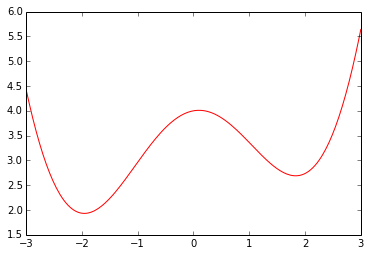

In [14]:
def f(x):
    return x**2 + 0.2*x + 4 * cos(x)

x = linspace(-3, 3, 200)
plot(x, f(x), 'r-')
xlim((-3, 3))

Uma alternativa para obter o mínimo de uma função é utilizar o método *BFGS* (Broyden–Fletcher–Goldfarb–Shanno), um método iterativo de otimização:

In [15]:
from scipy.optimize import fmin_bfgs

xmin = fmin_bfgs(f, 0)
xmin

Optimization terminated successfully.
         Current function value: 1.931741
         Iterations: 3
         Function evaluations: 27
         Gradient evaluations: 9


array([-1.95453947])

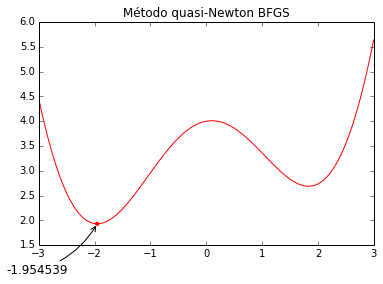

In [17]:
def show_opt_result(x, f, xmin, opt_title=None):

    plot(x, f(x), 'r-')
    xlim((-3,3))
    scatter([xmin],[f(xmin)], 10, color='red')
    annotate('%f' % xmin, 
            xy=(xmin, f(xmin)), fontsize=12, xycoords='data',
            xytext=(-90, -50), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
    if opt_title != None:
        title(opt_title)
    
show_opt_result(x, f, xmin, u'Método quasi-Newton BFGS')

Um problema com este método é que dependendo do ponto inicial o processo de otimização pode ficar "preso" em um **mínimo local**. No exemplo anterior, o algoritmo foi inicializado com $x = 0$ (o segundo argumento de `fmin_bfgs`). Eis o resultado se a inicialização fosse $x = 1$:

[ 1.83210513]


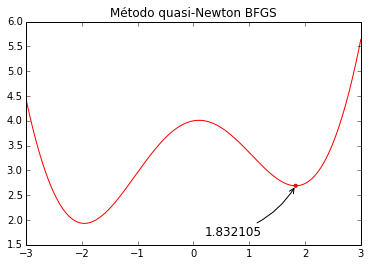

In [19]:
xmin = fmin_bfgs(f, 1, disp=0)
print xmin
show_opt_result(x, f, xmin, u'Método quasi-Newton BFGS')

Podemos computar o mínimo global por **força bruta**, isto é, calculando o valor de $f(x)$ para *todo $x$* em uma certa *grade* (conjunto de valores em um intervalo espaçado). 

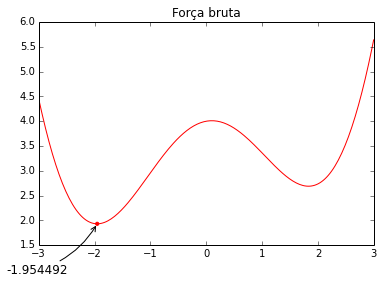

In [20]:
from scipy.optimize import brute
grid = (-3, 3, 0.1)
xmin = brute(f, (grid,))
show_opt_result(x, f, xmin, u'Força bruta')

Obviamente, se a grade for muito grande, a execução de `brute` se torna **muito lenta**. Outros algoritmos podem ser utilizados como, por exemplo, *basin hopping*. Com um número suficiente de iterações, o método pode encontrar o mínimo global:

In [21]:
from scipy.optimize import basinhopping
# Número de iterações não é o suficiente
xmin = basinhopping(f, 1, niter=200)
xmin

    nfev: 3258
     fun: 2.6896496507852756
       x: array([ 1.83210529])
 message: ['requested number of basinhopping iterations completed successfully']
    njev: 1086
     nit: 200

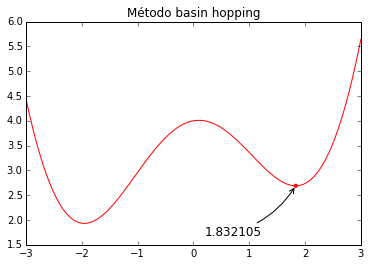

In [22]:
show_opt_result(x, f, xmin.x, u'Método basin hopping')

In [23]:
# Novamente, com um maior número de iterações
xmin = basinhopping(f, 1, niter=250)
xmin

    nfev: 4170
     fun: 2.6896496507852756
       x: array([ 1.83210529])
 message: ['requested number of basinhopping iterations completed successfully']
    njev: 1390
     nit: 250

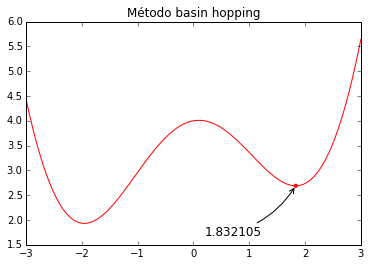

In [24]:
show_opt_result(x, f, xmin.x, u'Método basin hopping')

### *Fitting*

Suponha que tenhamos obtido uma *amostra* de $f(x)$ com algum *ruído*:

(-3, 3)

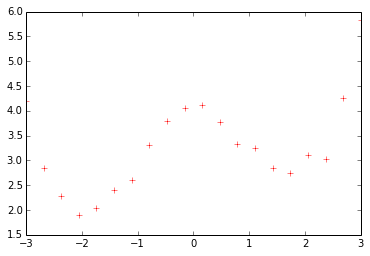

In [25]:
Xdata = linspace(-3, 3, num=20)
Ydata = f(Xdata) + 0.2 * np.random.randn(Xdata.size)
plot(Xdata, Ydata, 'r+')
xlim((-3,3))

Suponha que nós tenhamos um bom **modelo paramétrico**, mas com os parâmetros desconhecidos. Aqui, nosso modelo é da forma $\theta_1 x^2 + \theta_2 x + \theta_3 \cos(x)$:

In [26]:
def model(x, theta1, theta2, theta3):
    return theta1 * x**2 + theta2 * x + theta3 * cos(x)

Nós podemos estimar os parâmetros $\theta_1$, $\theta_2$ e $\theta_3$ através do método de **mínimos quadrados**:

In [27]:
from scipy.optimize import curve_fit

In [28]:
palpite = [1,1,1]
theta, theta_cov = curve_fit(model, Xdata, Ydata, palpite)
theta

array([ 0.99679034,  0.23378448,  4.00294214])

Note como o resultado acima é muito próximo da nossa função verdadeira, $f(x) = x^2 + 0.2 x + 4 \cos(x)$.

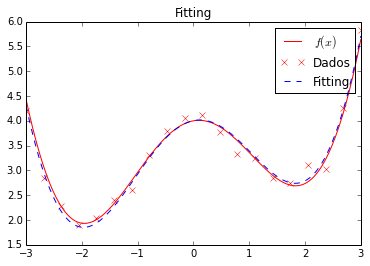

In [29]:
X = linspace(-3, 3, num=200)
plot(X, f(X), 'r-', label=r'$f(x)$') 
plot(Xdata, Ydata, 'rx', label=r'Dados')
theta1, theta2, theta3 = theta
Y_model = [model(x, theta1, theta2, theta3) for x in X]
plot(X, Y_model, 'b--', label=r'Fitting')
xlim((-3,3))
title(u'Fitting')
legend()

O resultado obtido é satisfatório, mas há um porém: o **modelo escolhido é perfeito**, isto é, ele tem a mesma forma paramétrica da verdadeira função $f(x)$. E se o modelo proposto fosse menos preciso? Abaixo, temos o resultado obtido por um modelo polinomial $\theta_1 x^2 + \theta_2 x + \theta_3$:

In [30]:
def model2(x, theta1, theta2, theta3):
    return theta1 * x**2 + theta2 * x + theta3

In [31]:
palpite = [1,1,1]
theta, theta_cov = curve_fit(model2, Xdata, Ydata, palpite)
theta

array([ 0.07127368,  0.23378449,  3.05144001])

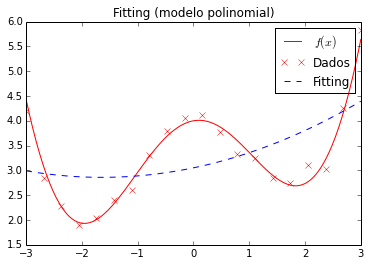

In [32]:
X = linspace(-3, 3, num=200)
plot(X, f(X), 'r-', label=r'$f(x)$') 
plot(Xdata, Ydata, 'rx', label=r'Dados')
theta1, theta2, theta3 = theta
Y_model = [model2(x, theta1, theta2, theta3) for x in X]
plot(X, Y_model, 'b--', label=r'Fitting')
xlim((-3,3))
title(u'Fitting (modelo polinomial)')
legend()

### Exemplo - determinação de uma função para temperatura anual

Os vetores abaixo correspondem às temperaturas extremas do Alasca para cada mês (em °C):

In [33]:
tmax = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
tmin = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
month = arange(12)

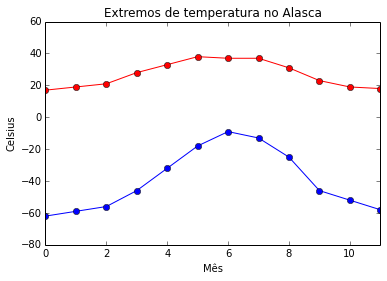

In [34]:
plot(month, tmin, 'bo-')
plot(month, tmax, 'ro-')
xlim(0,11)
ylim(-80,60)
ylabel(r'Celsius')
xlabel(u'Mês')
title(r'Extremos de temperatura no Alasca')

A partir desses dados, gostaríamos de estimar funções para prever a temperatura ao longo do ano. O formato se "sino" dos gráficos acima sugere que uma função Gaussiana poderia produzir um bom *fitting*:

In [36]:
import scipy.optimize as opt

def f(x, a, b, c, d):
    return a * exp(-(x-b)**2/(2*c**2)) + d

In [37]:
theta_min, theta_min_cov = opt.curve_fit(f, month, tmin, [10., 6, 2, -60])
theta_min

array([ 52.64929193,   6.16452601,   1.9759001 , -61.32093597])

In [38]:
theta_max, theta_max_cov = opt.curve_fit(f, month, tmax, [10., 6, 2, -60])
theta_max

array([ 23.09208263,   5.73581613,   2.2944347 ,  15.77932609])

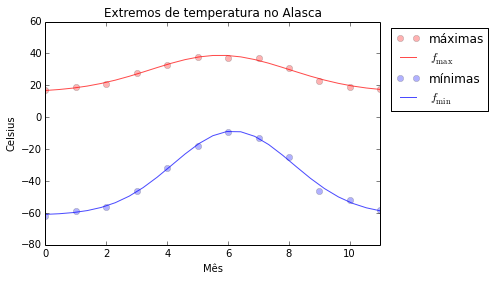

In [39]:
X = linspace(0, 11, 25)
a, b, c, d = theta_max
plot(month, tmax, 'ro', linewidth=3, alpha=0.3, label=u'máximas')
plot(X, [f(x, a, b, c, d) for x in X], 'r-', alpha=0.7, label=r'$f_{\max}$')

a, b, c, d = theta_min
plot(month, tmin, 'bo', linewidth=3, alpha=0.3, label=u'mínimas')
plot(X, [f(x, a, b, c, d) for x in X], 'b-', alpha=0.7, label=r'$f_{\min}$')

ylabel(r'Celsius')
xlabel(u'Mês')
xlim(0,11)
ylim(-80,60)
legend(bbox_to_anchor=(1.34,1))
title(r'Extremos de temperatura no Alasca')

## Estatística - `scipy.stats`

### Funções de densidade de probabilidade

In [40]:
from scipy import stats

O módulo `stats` fornece diversas funções de densidade de probabilidade (pdf). Abaixo, são computadas as probabilidades para todo ponto $x$ em um certo domínio $X$, tomando-se uma distribuição normal com média igual a 5 e desvio padrão igual a 1,5.: 

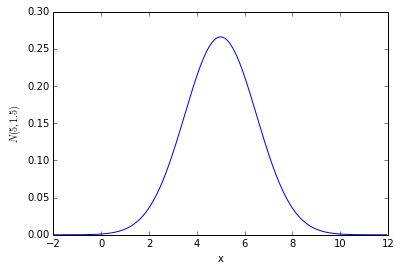

In [41]:
X = arange(-2, 12, 0.05)
plot(X, [stats.norm.pdf(x, 5., 1.5) for x in X])
xlabel('x')
ylabel(r'$N(5, 1.5)$')

### *Fitting*

Uma atividade frequente em análise estatística é estimar os parâmetros de uma distribuição a partir de dados observados. Os métodos `fit` das várias distribuições encontradas em `stats` são capazes de realizar a estimação dos parâmetros por máxima verossimilhança (*maximum likelihood estimate* - MLE). Como exemplo, considere os dados de comprimento da sépala para *Iris setosa*:

In [42]:
iris_data = loadtxt('./data/iris.data.txt', usecols=(0,1,2,3))
iris_class = loadtxt('./data/iris.data.txt', dtype='string')[:,4]

setosa = iris_data[iris_class == 'Iris-setosa']

O exemplo abaixo ilustra a estimação para a distribuição normal:

In [43]:
sep_len = setosa[:,0]
mu, sig = stats.norm.fit(sep_len)
mu, sig

(5.0059999999999993, 0.34894698737773899)

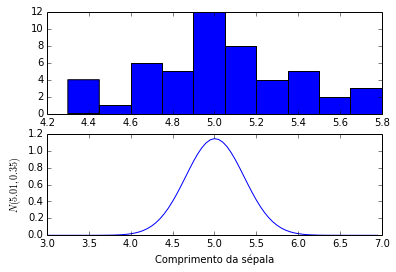

In [44]:
subplot(2,1,1)
n, pan, binstches = hist(sep_len, 10)

subplot(2,1,2)
X = arange(3, 7, 0.05)
plot(X, [stats.norm.pdf(x, mu, sig) for x in X])
xlabel(u'Comprimento da sépala')
ylabel(r'$N(%.2f, %.2f)$' % (mu, sig))

### Percentis

Vamos olhar mais uma vez os dados sobre o comprimento de sépala em *Iris setosa*:

{'boxes': [<matplotlib.lines.Line2D at 0x7fd24a985cd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd24a985050>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd24a967990>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd24a967350>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd24a9786d0>,
  <matplotlib.lines.Line2D at 0x7fd24a978950>]}

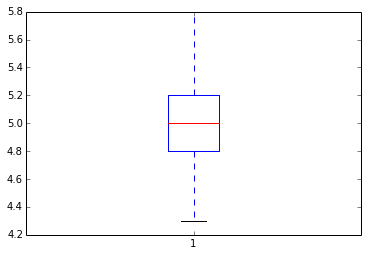

In [45]:
boxplot(sep_len)

Abaixo, computamos a mediana utilizando `median` da NumPy:

In [54]:
median(sep_len)

5.0

A mediana obviamente coincide com o percentil 50:

In [47]:
stats.scoreatpercentile(sep_len, 50)

5.0

Qualquer percentil pode ser recuperado:

In [48]:
stats.scoreatpercentile(sep_len, 90)

5.4100000000000001

In [49]:
stats.scoreatpercentile(sep_len, 15)

4.5999999999999996

### Testes estatísticos

O teste t-Student toma duas amostras independentes e verifica a hipótese de que a média das duas populações (assumindo a mesma variância ) são iguais (hipótese nula - *null-hypothesis*). O teste avalia se a média esperada difere significativamente entre as duas amostras. Implementado na rotina `ttest_ind`, o teste também computa o **p-valor**. Se o valor do p-valor for menor que um limiar (por exemplo, 1%), rejeita-se a hipótese de médias iguais.

Considere como exemplo três amostras, $a$, $b$ e $c$. As amostras $a$ e $c$ são produzidas a partir de uma distribuição normal $\mathcal{N}(0, 1.)$ enquanto que $b$ é oriunda de uma distribuição $\mathcal{N}(1, 1)$. Note que todas as distribuições tem a mesma variâncias, mas a distribuição de $b$ difere das outras duas em relação à média:

In [50]:
a = random.normal(0, 1, size=500)
b = random.normal(1, 1, size=100)
c = random.normal(0, 1, size=100)

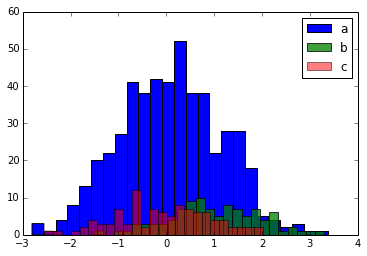

In [51]:
n, pan, binstches = hist(a, 25, label='a')
n, pan, binstches = hist(b, 25, alpha=0.75, label='b')
n, pan, binstches = hist(c, 25, alpha=0.5, label='c')
legend()

Como esperado, $a$ e $b$ diferem segundo o teste (note o baixíssimo p-valor):

In [52]:
stats.ttest_ind(a, b)

(array(-7.909491820537069), 1.2543669370788646e-14)

O teste corretamente informa que não podemos descartar a hipótese nula para $a$ e $c$:

In [53]:
stats.ttest_ind(a, c)

(array(1.4063472280123595), 0.16014046251022981)